<a href="https://colab.research.google.com/github/ikeasamoahansah/ey-uhi/blob/main/uhi_building_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import geopandas as gpd

In [12]:
ftrain = pd.read_csv('ftrain.csv')
bdin = gpd.read_file('Building_Footprint.kml')

In [13]:
ftrain.head()

,Longitude,Latitude,datetime,UHI Index
0,-73.909167,40.813107,24-07-2021 15:53,1.030289
1,-73.909187,40.813045,24-07-2021 15:53,1.030289
2,-73.909215,40.812978,24-07-2021 15:53,1.023798
3,-73.909242,40.812908,24-07-2021 15:53,1.023798
4,-73.909257,40.812845,24-07-2021 15:53,1.021634


In [14]:
bdin.head()

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-73.91903 40.8482, -73.91933 4..."
1,,,"MULTIPOLYGON (((-73.92195 40.84963, -73.92191 ..."
2,,,"MULTIPOLYGON (((-73.9205 40.85011, -73.92045 4..."
3,,,"MULTIPOLYGON (((-73.92056 40.8514, -73.92053 4..."
4,,,"MULTIPOLYGON (((-73.91234 40.85218, -73.91247 ..."


In [15]:
bdin['area'] = bdin.geometry.area
bdin['perimeter'] = bdin.geometry.length
bdin['centroid'] = bdin.geometry.centroid

<ipython-input-15-c420dbebaf36>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bdin['area'] = bdin.geometry.area
<ipython-input-15-c420dbebaf36>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bdin['perimeter'] = bdin.geometry.length
<ipython-input-15-c420dbebaf36>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bdin['centroid'] = bdin.geometry.centroid


In [31]:
uhi_gdf = gpd.GeoDataFrame(ftrain, geometry=gpd.points_from_xy(ftrain.Longitude, ftrain.Latitude))
uhi_gdf = uhi_gdf.set_crs(epsg=4326)

In [32]:
merged_gdf = gpd.sjoin(uhi_gdf, bdin, how='left')
merged_gdf.head()

,Longitude,Latitude,datetime,UHI Index,geometry,index_right,Name,Description,area,perimeter,centroid
0,-73.909167,40.813107,24-07-2021 15:53,1.030289,POINT (-73.90917 40.81311),NaN,NaN,NaN,NaN,NaN,None
1,-73.909187,40.813045,24-07-2021 15:53,1.030289,POINT (-73.90919 40.81304),NaN,NaN,NaN,NaN,NaN,None
2,-73.909215,40.812978,24-07-2021 15:53,1.023798,POINT (-73.90922 40.81298),NaN,NaN,NaN,NaN,NaN,None
3,-73.909242,40.812908,24-07-2021 15:53,1.023798,POINT (-73.90924 40.81291),NaN,NaN,NaN,NaN,NaN,None
4,-73.909257,40.812845,24-07-2021 15:53,1.021634,POINT (-73.90926 40.81284),NaN,NaN,NaN,NaN,NaN,None


In [33]:
merged_gdf.describe()

,Longitude,Latitude,UHI Index,index_right,area,perimeter
count,11229.000000,11229.000000,11229.000000,638.000000,6.380000e+02,638.000000
mean,-73.933927,40.808800,1.000001,7125.694357,6.806648e-07,0.004888
std,0.028253,0.023171,0.016238,1767.133221,4.133120e-07,0.002593
min,-73.994457,40.758792,0.956122,104.000000,1.215800e-08,0.000472
25%,-73.955703,40.790905,0.988577,6310.000000,2.903082e-07,0.003446
50%,-73.932968,40.810688,1.000237,7457.000000,7.778585e-07,0.004140
75%,-73.909647,40.824515,1.011176,8341.000000,8.678520e-07,0.005975
max,-73.879458,40.859497,1.046036,9377.000000,2.746898e-06,0.013573


In [34]:
merged_gdf.isna().sum()

,0
Longitude,0
Latitude,0
datetime,0
UHI Index,0
geometry,0
index_right,10591
Name,10591
Description,10591
area,10591
perimeter,10591


In [35]:
aggregated = merged_gdf.groupby('UHI Index').agg({
    'area': 'mean',
    'perimeter': 'mean'
}).reset_index()

In [36]:
finaldf = pd.merge(uhi_gdf, aggregated, on='UHI Index', how='left')

In [37]:
finaldf.head()

,Longitude,Latitude,datetime,UHI Index,geometry,area,perimeter
0,-73.909167,40.813107,24-07-2021 15:53,1.030289,POINT (-73.90917 40.81311),NaN,NaN
1,-73.909187,40.813045,24-07-2021 15:53,1.030289,POINT (-73.90919 40.81304),NaN,NaN
2,-73.909215,40.812978,24-07-2021 15:53,1.023798,POINT (-73.90922 40.81298),NaN,NaN
3,-73.909242,40.812908,24-07-2021 15:53,1.023798,POINT (-73.90924 40.81291),NaN,NaN
4,-73.909257,40.812845,24-07-2021 15:53,1.021634,POINT (-73.90926 40.81284),NaN,NaN


In [38]:
finaldf.tail()

,Longitude,Latitude,datetime,UHI Index,geometry,area,perimeter
11224,-73.957050,40.790333,24-07-2021 15:57,0.972470,POINT (-73.95705 40.79033),NaN,NaN
11225,-73.957063,40.790308,24-07-2021 15:57,0.972470,POINT (-73.95706 40.79031),NaN,NaN
11226,-73.957093,40.790270,24-07-2021 15:57,0.981124,POINT (-73.95709 40.79027),8.678520e-07,0.004134
11227,-73.957112,40.790253,24-07-2021 15:59,0.981245,POINT (-73.95711 40.79025),9.217222e-07,0.004336
11228,-73.957128,40.790237,24-07-2021 15:59,0.983408,POINT (-73.95713 40.79024),NaN,NaN


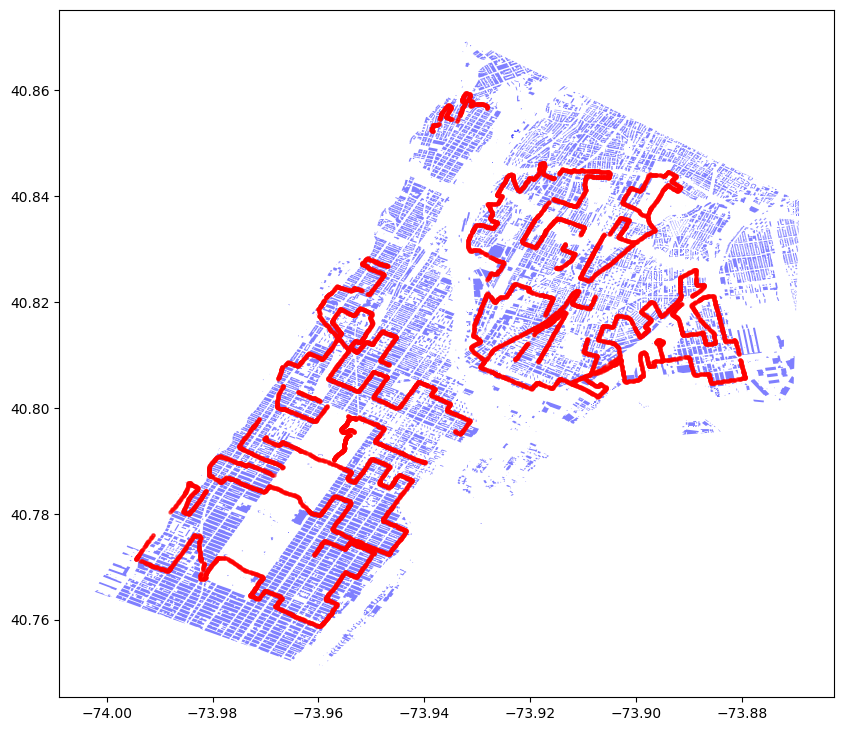

In [28]:
import matplotlib.pyplot as plt

bdin.plot(color='blue', alpha=0.5, figsize=(10, 10))

uhi_gdf.plot(ax=plt.gca(), color='red', markersize=5, alpha=0.5)

plt.show()

In [39]:
print(uhi_gdf.crs)
print(bdin.crs)

EPSG:4326
EPSG:4326


In [40]:
# Handling missing values in final dataset

finaldf['has_building'] = finaldf['area'].notna().astype(int)

finaldf['area'] = finaldf['area'].fillna(0)
finaldf['perimeter'] = finaldf['perimeter'].fillna(0)

In [43]:
finaldf.drop(columns=['geometry'], inplace=True)
finaldf.tail()

,Longitude,Latitude,datetime,UHI Index,area,perimeter,has_building
11224,-73.957050,40.790333,24-07-2021 15:57,0.972470,0.000000e+00,0.000000,0
11225,-73.957063,40.790308,24-07-2021 15:57,0.972470,0.000000e+00,0.000000,0
11226,-73.957093,40.790270,24-07-2021 15:57,0.981124,8.678520e-07,0.004134,1
11227,-73.957112,40.790253,24-07-2021 15:59,0.981245,9.217222e-07,0.004336,1
11228,-73.957128,40.790237,24-07-2021 15:59,0.983408,0.000000e+00,0.000000,0


In [44]:
finaldf.to_csv('finaltrain.csv')